In [ ]:
import pickle
import pandas as pd
import numpy as np
from evaluations import * 

# Read Data

In [6]:
good_questions = np.load('Data/OpinionQA/good_questions.npy')
Qs = pd.read_csv('Data/OpinionQA/Qs_to_use.csv')
with open('Data/OpinionQA/surveys.pkl', 'rb') as f:
    surveys = pickle.load(f)
with open('Data/OpinionQA/synthetic answers/clean/synthetic_answers_clean_4o.pkl', 'rb') as f:
    synthetic_answers = pickle.load(f)

real_answers = {}
for i in range(len(good_questions)):
    vals_i = surveys[good_questions[i]]['RESPONSE_NUMERIC'].values
    real_answers[good_questions[i]] = vals_i

In [7]:
len(good_questions), len(surveys), len(synthetic_answers)

(385, 385, 385)

# Sample Uses

In [8]:
alpha = 0.1
gamma = 0.5
k_max = 100
ks = np.arange(1, k_max+1)
C = np.sqrt(2)
train_proportion = 0.6

threshold:  0.05
k_hat:  57
synthetic CI width:  0.4585049903919424
test miscoverage rate:  0.032467532467532464


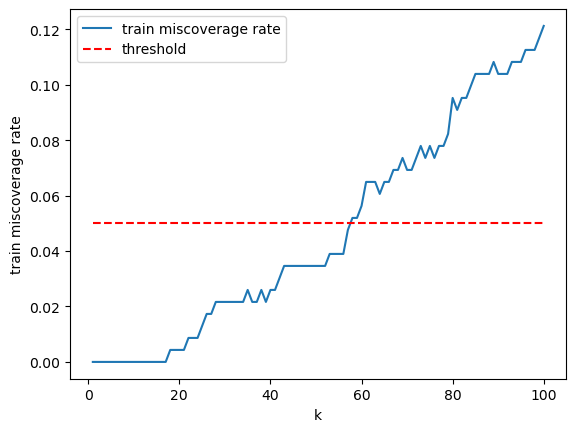

In [9]:
_, _, _ = one_split_run(real_answers, synthetic_answers, good_questions, alpha, gamma, k_max, C, train_proportion, 
                        type = 'interval', synth_CI_type = 'Hoeffding', rv_bound = 2, seed = 1, report = True, k_report = 10)

threshold:  0.05
k_hat:  60
synthetic CI width:  0.4468953847418873
test miscoverage rate:  0.03896103896103896


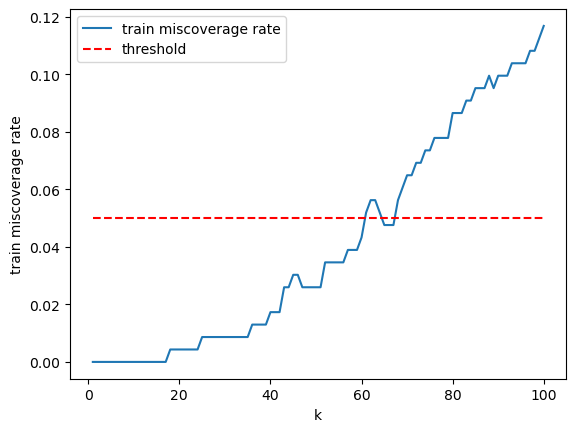

In [10]:
_, _, _ = one_split_run(real_answers, synthetic_answers, good_questions, alpha, gamma, k_max, C, train_proportion, 
                        type = 'point', synth_CI_type = 'Hoeffding', rv_bound = 2, seed = 0, report = True, k_report = 10)

In [11]:
results_interval, report_interval = multiple_split_run(real_answers, synthetic_answers, good_questions, alpha, gamma, k_max, C, train_proportion, 
                                                       type = 'interval', synth_CI_type = 'Hoeffding', rv_bound = 2, 
                                                       seed = 0, num_splits = 100, split_report = 1, report = True)
results_point, report_point = multiple_split_run(real_answers, synthetic_answers, good_questions, alpha, gamma, k_max, C, train_proportion,
                                                 type = 'point', synth_CI_type = 'Hoeffding', rv_bound = 2, 
                                                 seed = 0, num_splits = 100, split_report = 1, report = True)

In [12]:
results_interval

,k_hat,synth_CI_width,test_miscov_rate
0,73.0,0.405154,0.090909
1,59.0,0.450667,0.038961
2,60.0,0.446895,0.045455
3,56.0,0.462581,0.025974
4,60.0,0.446895,0.045455
...,...,...,...
95,79.0,0.389465,0.110390
96,57.0,0.458505,0.032468
97,66.0,0.426098,0.064935
98,57.0,0.458505,0.032468


In [13]:
results_point

,k_hat,synth_CI_width,test_miscov_rate
0,76.0,0.397077,0.090909
1,60.0,0.446895,0.038961
2,60.0,0.446895,0.032468
3,58.0,0.454535,0.019481
4,60.0,0.446895,0.045455
...,...,...,...
95,79.0,0.389465,0.110390
96,60.0,0.446895,0.032468
97,69.0,0.416732,0.064935
98,60.0,0.446895,0.032468


In [14]:
report_interval

,mean,std
k_hat,62.190000,6.268485
synth_CI_width,0.440520,0.020889
test_miscov_rate,0.051104,0.023853


In [15]:
report_point

,mean,std
k_hat,64.300000,6.891299
synth_CI_width,0.433415,0.021638
test_miscov_rate,0.051364,0.025418
